# Analyse Exploratoire des ventes d'un Magasin d'électroniques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
data = r'C:\Users\THINKPAD\OneDrive\Bureau\COURS_DATA_ANALYST\Cours_Kevin\data-analyst-main\datasets\SalesAnalysis\Sales_Data\\'

In [3]:
os.listdir(data)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
janvier_sales = pd.read_csv(data + "\Sales_January_2019.csv")

In [5]:
janvier_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [6]:
janvier_sales.describe(include='all')

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


In [7]:
janvier_sales.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

# Quel est le meilleur mois de vente ? 
# et Quel est le chiffre d'affaires de ce mois ?

## Merger la data

In [8]:
files = [fichier for fichier in os.listdir(data) if fichier.endswith('.csv')]

In [10]:
# files
len(files)

12

In [12]:
df = pd.DataFrame()

for file in files:
    data_interm = pd.read_csv(data + file)
    df = pd.concat([df, data_interm])
    

In [13]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
df.shape

(186850, 6)

In [15]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Netoyage de la donnée

In [17]:
df.isnull().sum(axis=0)

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [18]:
val_manquantes = df[df.isnull().any(axis=1)]
val_manquantes

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
val_manquantes.isnull().all()

Order ID            True
Product             True
Quantity Ordered    True
Price Each          True
Order Date          True
Purchase Address    True
dtype: bool

In [20]:
df.shape

(186850, 6)

In [21]:
df.dropna(inplace=True)

In [60]:
df.isnull().any() #vérification de l'existence de NaN

Order ID            False
Product             False
Quantity Ordered    False
Price Each          False
Order Date          False
Purchase Address    False
dtype: bool

In [61]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
"""""" pas normal  que top Order ID egal order ID
donc nous allons vérifier les éléments de la colonne Ordre ID""""""

In [ ]:
# Débarassons-nous des lignes avec valeurs abérantes

In [82]:
df[df['Order Date'] == "Order Date"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [24]:
"1548".isdigit()

True

In [27]:
# localiser les elmts de Order ID qui ne sont pas des digits
df.loc[~df["Order ID"].str.isdigit(), :]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10000,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10387,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11399,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11468,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [28]:
df.drop(df['Order Date'] == "Order Date")

KeyError: '[False False False ... False False False] not found in axis'

In [84]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [31]:
df_clean = df.drop(df.loc[df['Order Date'] == "Order Date", :].index)

In [32]:
df_clean.loc[~df_clean['Order ID'].str.isdigit(), :]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [88]:
"""Changement de types"""

'Changement de type'

In [33]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [34]:
 df_clean.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [35]:
df_clean['Quantity Ordered'] = df_clean['Quantity Ordered'].astype('int')

In [36]:
df_clean['Price Each'] = pd.to_numeric(df_clean['Price Each'])

In [37]:
df_clean['Order Date'] = pd.to_datetime(df_clean['Order Date'])

In [95]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          182735 non-null  object        
 1   Product           182735 non-null  object        
 2   Quantity Ordered  182735 non-null  int32         
 3   Price Each        182735 non-null  float64       
 4   Order Date        182735 non-null  datetime64[ns]
 5   Purchase Address  182735 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), object(3)
memory usage: 9.1+ MB


In [38]:
df['Order Date']

0        04/19/19 08:46
2        04/07/19 22:30
3        04/12/19 14:38
4        04/12/19 14:38
5        04/30/19 09:27
              ...      
11681    09/17/19 20:56
11682    09/01/19 16:00
11683    09/23/19 07:39
11684    09/19/19 17:30
11685    09/30/19 00:18
Name: Order Date, Length: 186305, dtype: object

In [39]:
df_clean['Order Date']

0       2019-04-19 08:46:00
2       2019-04-07 22:30:00
3       2019-04-12 14:38:00
4       2019-04-12 14:38:00
5       2019-04-30 09:27:00
                ...        
11681   2019-09-17 20:56:00
11682   2019-09-01 16:00:00
11683   2019-09-23 07:39:00
11684   2019-09-19 17:30:00
11685   2019-09-30 00:18:00
Name: Order Date, Length: 182735, dtype: datetime64[ns]

# Analyse Exploratoire

## Meilleure mois de vente

In [45]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Chiffre_Affaire
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99


In [46]:
df_clean = df_clean.set_index('Order Date')

In [47]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire
Order Date,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",99.99
2019-04-12 14:38:00,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",600.00
2019-04-12 14:38:00,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",11.99
2019-04-30 09:27:00,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",11.99


In [48]:
df_clean.sort_index(inplace=True) 

In [49]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire
Order Date,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",23.90


In [50]:
df_clean['Month'] = df_clean.index.month_name()

In [51]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire,Month
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",11.99,January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",11.95,January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",150.00,January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2.99,January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",23.90,January


In [52]:
df_clean['Chiffre_Affaire'] = df_clean['Quantity Ordered']*df_clean['Price Each']

In [53]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire,Month
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",11.99,January
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",11.95,January
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",150.00,January
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2.99,January
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",23.90,January


In [54]:
df_clean.groupby('Month')['Chiffre_Affaire'].sum().sort_values(ascending=False)

Month
December     4557905.42
October      3679254.16
April        3336376.42
November     3149785.09
May          3101881.04
March        2755969.40
July         2587444.91
June         2524464.99
August       2191698.31
February     2158127.48
September    2050361.26
January      1786511.29
Name: Chiffre_Affaire, dtype: float64

In [55]:
order = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]

In [56]:
df_clean.groupby('Month')['Chiffre_Affaire'].sum().loc[order]

Month
January      1786511.29
February     2158127.48
March        2755969.40
April        3336376.42
May          3101881.04
June         2524464.99
July         2587444.91
August       2191698.31
September    2050361.26
October      3679254.16
November     3149785.09
December     4557905.42
Name: Chiffre_Affaire, dtype: float64

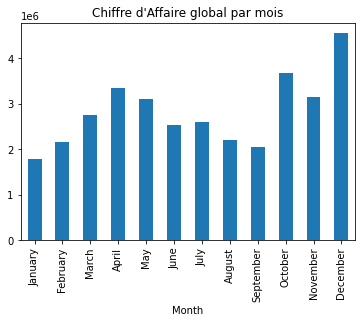

In [58]:
df_clean.groupby('Month')['Chiffre_Affaire'].sum().loc[order].plot.bar()
plt.title("Chiffre d'Affaire global par mois")
plt.show()

In [61]:
df_clean.groupby('Month')['Chiffre_Affaire'].sum().sort_values(ascending=False).December

4557905.42

# La ville de vente de plus de produit

In [175]:
 df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Chiffre_Affaire
Order Date,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90


In [66]:
ville_max_ca = df_clean.groupby('Purchase Address')['Chiffre_Affaire'].sum().sort_values(ascending=False).index[0].split(',')
ville_max_ca

['668 Park St', ' San Francisco', ' CA 94016']

In [189]:
f'La ville de {ville_max_ca[1].upper()} a enregistré le plus grand nombre de produit vendu'

'La ville de  SAN FRANCISCO a enregistré le plus grand nombre de produit vendu'

### Meilleure méthode

In [68]:
df_clean['Purchase Address'].unique()

array(['9 Lake St, New York City, NY 10001',
       '760 Church St, San Francisco, CA 94016',
       '735 5th St, New York City, NY 10001', ...,
       '731 7th St, New York City, NY 10001',
       '754 Hickory St, New York City, NY 10001',
       '657 Spruce St, New York City, NY 10001'], dtype=object)

In [70]:
def get_ville(addresse):
    return addresse.split(',')[1].strip()

In [71]:
get_ville("760 Church St, San Francisco, CA 94016")

'San Francisco'

In [72]:
df_clean['ville'] = df_clean['Purchase Address'].apply(get_ville)

In [199]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Chiffre_Affaire,ville
Order Date,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta


In [201]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Chiffre_Affaire,ville
Order Date,,,,,,,,
2019-03-21 14:21:00,170400,AAA Batteries (4-pack),2,2.99,"168 Johnson St, San Francisco, CA 94016",March,5.98,San Francisco
2019-08-12 11:40:00,245811,Apple Airpods Headphones,1,150.00,"511 Walnut St, Seattle, WA 98101",August,150.00,Seattle
2019-01-04 09:15:00,145124,Vareebadd Phone,1,400.00,"560 Johnson St, Los Angeles, CA 90001",January,400.00,Los Angeles
2019-12-06 23:33:00,311567,Lightning Charging Cable,1,14.95,"462 Elm St, New York City, NY 10001",December,14.95,New York City
2019-11-17 20:11:00,282531,AAA Batteries (4-pack),1,2.99,"815 Jefferson St, San Francisco, CA 94016",November,2.99,San Francisco


In [78]:
df_clean['ville'].unique().shape[0]

9

In [80]:
df_clean.groupby('ville')['Chiffre_Affaire'].sum().sort_values(ascending=False)

ville
San Francisco    8124120.94
Los Angeles      5354039.93
New York City    4581658.91
Boston           3604080.86
Atlanta          2741642.05
Dallas           2717793.72
Seattle          2693048.60
Portland         2276649.24
Austin           1786745.52
Name: Chiffre_Affaire, dtype: float64

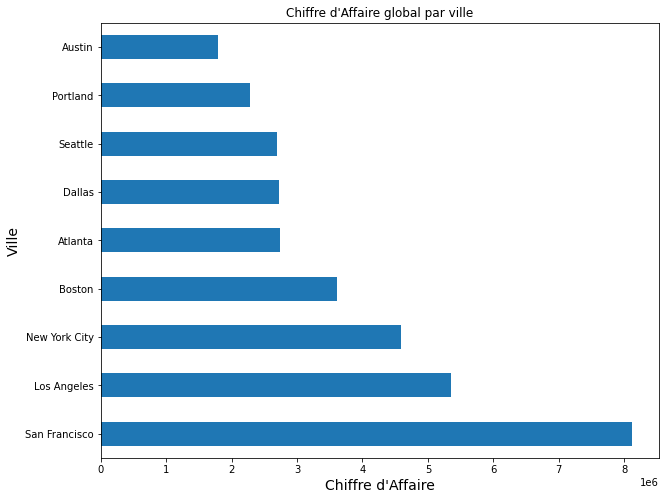

In [81]:
df_clean.groupby('ville').sum()["Chiffre_Affaire"].sort_values(ascending=False).plot.barh(figsize=(10, 8))
plt.title("Chiffre d'Affaire global par ville")
plt.xlabel("Chiffre d'Affaire", fontsize='14')
plt.ylabel("Ville", fontsize='14')
plt.show()

# La vente par heure

In [220]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Chiffre_Affaire,ville
Order Date,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta


In [82]:
df_clean['hour'] = df_clean.index.hour
df_clean['time'] = df_clean.index.time

In [227]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Chiffre_Affaire,ville,hour,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",January,11.99,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",January,11.95,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",January,150.00,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",January,2.99,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",January,23.90,Atlanta,6,06:03:00


In [230]:
df_clean.groupby('hour')['Chiffre_Affaire'].sum().sort_values(ascending=False)

hour
19    2370005.59
12    2269676.91
11    2267169.73
20    2242856.37
18    2176209.65
13    2118394.83
17    2086082.23
14    2045085.42
21    2013288.02
10    1907179.29
15    1900151.56
16    1864530.92
9     1612498.90
22    1578173.21
8     1181363.76
23    1161803.96
7      734595.75
0      698694.76
1      447663.86
6      441523.14
2      234191.08
5      224313.72
4      161350.57
3      142976.54
Name: Chiffre_Affaire, dtype: float64

In [232]:
ca_par_heure = pd.DataFrame(df_clean.groupby('hour')['Chiffre_Affaire'].sum())

In [233]:
ca_par_heure

,Chiffre_Affaire
hour,
0,698694.76
1,447663.86
2,234191.08
3,142976.54
4,161350.57
5,224313.72
6,441523.14
7,734595.75
8,1181363.76


Text(0, 0.5, "Chiffre d'Affaire")

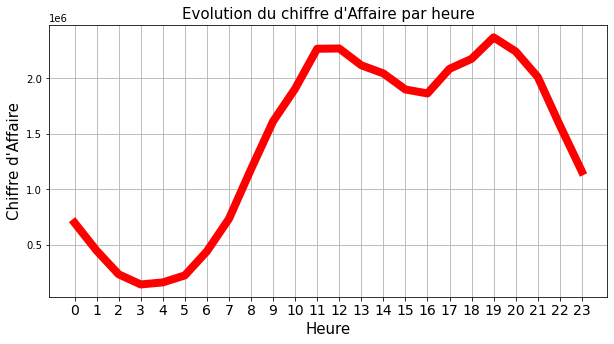

In [256]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=ca_par_heure['Chiffre_Affaire'], color='red', lw=8)
plt.title("Evolution du chiffre d'Affaire par heure", fontsize=15)
plt.xticks(ticks=range(0, 24), fontsize=14);
plt.xlabel('Heure', fontsize=15)
plt.grid()
plt.ylabel("Chiffre d'Affaire", fontsize=15)

# Quels sont les produits qui sont souvent achetés ensemble ?

In [85]:
df_clean.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire,Month,ville,hour,time
Order Date,,,,,,,,,,
2019-03-29 19:10:00,167173,Google Phone,1,600.00,"371 Spruce St, Boston, MA 02215",600.00,March,Boston,19,19:10:00
2019-04-19 13:30:00,182770,27in FHD Monitor,1,149.99,"986 4th St, Seattle, WA 98101",149.99,April,Seattle,13,13:30:00
2019-03-26 20:26:00,165887,iPhone,1,700.00,"589 11th St, Austin, TX 73301",700.00,March,Austin,20,20:26:00
2019-12-15 12:38:00,307607,Google Phone,1,600.00,"101 Pine St, Seattle, WA 98101",600.00,December,Seattle,12,12:38:00
2019-03-10 22:23:00,175791,Lightning Charging Cable,1,14.95,"432 Lake St, Seattle, WA 98101",14.95,March,Seattle,22,22:23:00


In [88]:
df_m = df_clean[df_clean['Order ID'].duplicated(keep=False)].copy()
df_m

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire,Month,ville,hour,time
Order Date,,,,,,,,,,
2019-01-01 07:29:00,144804,Wired Headphones,1,11.99,"628 Lake St, New York City, NY 10001",11.99,January,New York City,7,07:29:00
2019-01-01 07:29:00,144804,iPhone,1,700.00,"628 Lake St, New York City, NY 10001",700.00,January,New York City,7,07:29:00
2019-01-01 11:25:00,148074,USB-C Charging Cable,1,11.95,"6 Johnson St, Atlanta, GA 30301",11.95,January,Atlanta,11,11:25:00
2019-01-01 11:25:00,148074,Google Phone,1,600.00,"6 Johnson St, Atlanta, GA 30301",600.00,January,Atlanta,11,11:25:00
2019-01-01 12:02:00,148450,iPhone,1,700.00,"761 Lakeview St, Dallas, TX 75001",700.00,January,Dallas,12,12:02:00
...,...,...,...,...,...,...,...,...,...,...
2020-01-01 00:10:00,311386,Apple Airpods Headphones,1,150.00,"730 Pine St, San Francisco, CA 94016",150.00,January,San Francisco,0,00:10:00
2020-01-01 00:22:00,297817,Lightning Charging Cable,2,14.95,"519 13th St, New York City, NY 10001",29.90,January,New York City,0,00:22:00
2020-01-01 00:22:00,297817,iPhone,1,700.00,"519 13th St, New York City, NY 10001",700.00,January,New York City,0,00:22:00


In [86]:
def concat_produit_par_order_id(p: list):
  return ";".join(p)

In [92]:
df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

Order ID
141275              USB-C Charging Cable;Wired Headphones
141290     Apple Airpods Headphones;AA Batteries (4-pack)
141365                   Vareebadd Phone;Wired Headphones
141384                  USB-C Charging Cable;Google Phone
141450            Bose SoundSport Headphones;Google Phone
                               ...                       
319536                Macbook Pro Laptop;Wired Headphones
319556                      Google Phone;Wired Headphones
319584                            Wired Headphones;iPhone
319596                    iPhone;Lightning Charging Cable
319631    Lightning Charging Cable;34in Ultrawide Monitor
Name: Product, Length: 6928, dtype: object

In [93]:
ensemble = df_m.groupby('Order ID')['Product'].apply(concat_produit_par_order_id)

In [94]:
from itertools import combinations
from collections import Counter

count = Counter()

In [97]:
Counter(combinations(['a', 'c', 'b', 'e'], 3))

Counter({('a', 'c', 'b'): 1,
         ('a', 'c', 'e'): 1,
         ('a', 'b', 'e'): 1,
         ('c', 'b', 'e'): 1})

In [98]:
for i, j in combinations(['a', 'c', 'b'], 2):
    print(i, j)

a c
a b
c b


In [99]:
ensemble.to_list()

['USB-C Charging Cable;Wired Headphones',
 'Apple Airpods Headphones;AA Batteries (4-pack)',
 'Vareebadd Phone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'Bose SoundSport Headphones;Google Phone',
 'iPhone;Apple Airpods Headphones',
 'Google Phone;Apple Airpods Headphones',
 'Wired Headphones;iPhone;Apple Airpods Headphones',
 'USB-C Charging Cable;Apple Airpods Headphones',
 'Wired Headphones;Lightning Charging Cable',
 'iPhone;Lightning Charging Cable',
 'Bose SoundSport Headphones;27in FHD Monitor',
 'USB-C Charging Cable;Google Phone',
 'iPhone;Wired Headphones',
 'USB-C Charging Cable;Google Phone',
 'AA Batteries (4-pack);AAA Batteries (4-pack)',
 'Wired Headphones;Vareebadd Phone;USB-C Charging Cable',
 'USB-C Charging Cable;Google Phone',
 'Vareebadd Phone;Wired Headphones',
 'Lightning Charging Cable;34in Ultrawide Monitor',
 'USB-C Charging Cable;Wired Headphones',
 'Bose SoundSport Headphones;Lightning Charging Cable',
 'Wired Headphones;Google Phone',
 'Wired

In [100]:
for achat in ensemble.to_list():
    products = achat.split(';')
#     print(products)
    count.update(Counter(combinations(products, 2)))

In [101]:
count

Counter({('USB-C Charging Cable', 'Wired Headphones'): 109,
         ('Apple Airpods Headphones', 'AA Batteries (4-pack)'): 39,
         ('Vareebadd Phone', 'Wired Headphones'): 78,
         ('USB-C Charging Cable', 'Google Phone'): 480,
         ('Bose SoundSport Headphones', 'Google Phone'): 104,
         ('iPhone', 'Apple Airpods Headphones'): 181,
         ('Google Phone', 'Apple Airpods Headphones'): 12,
         ('Wired Headphones', 'iPhone'): 223,
         ('Wired Headphones', 'Apple Airpods Headphones'): 63,
         ('USB-C Charging Cable', 'Apple Airpods Headphones'): 32,
         ('Wired Headphones', 'Lightning Charging Cable'): 62,
         ('iPhone', 'Lightning Charging Cable'): 494,
         ('Bose SoundSport Headphones', '27in FHD Monitor'): 20,
         ('iPhone', 'Wired Headphones'): 229,
         ('AA Batteries (4-pack)', 'AAA Batteries (4-pack)'): 38,
         ('Wired Headphones', 'Vareebadd Phone'): 69,
         ('Wired Headphones', 'USB-C Charging Cable'): 89,
    

In [102]:
count.most_common(1)

[(('iPhone', 'Lightning Charging Cable'), 494)]

In [103]:
for ensemble, c in count.most_common(10):
    print(ensemble, c)

('iPhone', 'Lightning Charging Cable') 494
('Lightning Charging Cable', 'iPhone') 489
('Google Phone', 'USB-C Charging Cable') 486
('USB-C Charging Cable', 'Google Phone') 480
('iPhone', 'Wired Headphones') 229
('Wired Headphones', 'iPhone') 223
('Google Phone', 'Wired Headphones') 213
('Wired Headphones', 'Google Phone') 197
('Vareebadd Phone', 'USB-C Charging Cable') 182
('iPhone', 'Apple Airpods Headphones') 181


# Produit le plus vendu

In [104]:
df_clean.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Chiffre_Affaire,Month,ville,hour,time
Order Date,,,,,,,,,,
2019-01-01 03:07:00,147268,Wired Headphones,1,11.99,"9 Lake St, New York City, NY 10001",11.99,January,New York City,3,03:07:00
2019-01-01 03:40:00,148041,USB-C Charging Cable,1,11.95,"760 Church St, San Francisco, CA 94016",11.95,January,San Francisco,3,03:40:00
2019-01-01 04:56:00,149343,Apple Airpods Headphones,1,150.00,"735 5th St, New York City, NY 10001",150.00,January,New York City,4,04:56:00
2019-01-01 05:53:00,149964,AAA Batteries (4-pack),1,2.99,"75 Jackson St, Dallas, TX 75001",2.99,January,Dallas,5,05:53:00
2019-01-01 06:03:00,149350,USB-C Charging Cable,2,11.95,"943 2nd St, Atlanta, GA 30301",23.90,January,Atlanta,6,06:03:00


In [111]:
prod = pd.DataFrame(df_clean.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False))

In [110]:
f'{prod[1]} is the most sent product'

'27148 is the most sent product'

<Figure size 432x288 with 0 Axes>

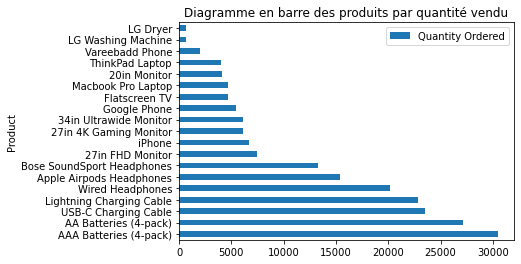

In [127]:
plt.figure()
prod.plot.barh()
plt.title('Diagramme en barre des produits par quantité vendu')
plt.show()